# First step is to make the model then we will train it and then pickle it.

# Importing the Data

**Importing the Libraries**

In [80]:
import numpy as np
import pandas as pd

In [81]:
crop = pd.read_csv("Crop_recommendation.csv")

In [82]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [83]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [84]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


**Checking for the NULL values in our dataset**

In [85]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

**Checking for duplicated values in our dataset**

In [86]:
crop.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool

In [87]:
crop.duplicated().sum()

0

**Describing Our Dataset**
**method is commonly applied to a dataset to generate a statistical summary of its numerical features. This method provides various descriptive statistics that offer insights into the distribution and characteristics of the data. Here are some of the statistics typically included in the output of the describe() method:**

**Count: The number of non-null (non-missing) values for each feature.**

**Mean: The average value of each feature.**

**Standard Deviation: A measure of the amount of variation or dispersion in a set of values.**

**Minimum: The smallest value in each feature.**

**25th Percentile (Q1): The value below which 25% of the data falls.**

**50th Percentile (Median or Q2): The middle value of the dataset, separating the higher half from the lower half.**

**75th Percentile (Q3): The value below which 75% of the data falls.**

**Maximum: The largest value in each feature.**

**The describe() method is especially useful during the exploratory data analysis (EDA) phase of a machine learning project. It provides a quick overview of the central tendency, spread, and shape of the distribution of each numerical feature in the dataset. This summary can help identify potential issues such as outliers, skewed distributions, or missing values, which can guide preprocessing and data cleaning steps.**

In [88]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Exploring Data

Correlation coefficients quantify the strength and direction of a linear relationship between two variables. The values range from -1 to 1, where:

1 indicates a perfect positive correlation (as one variable increases, the other also increases),
-1 indicates a perfect negative correlation (as one variable increases, the other decreases),
0 indicates no linear correlation.

This method is particularly useful during the exploratory data analysis (EDA) phase of a machine learning project. Understanding the correlations between features can provide insights into the relationships within the data. High correlations between features might indicate multicollinearity, where two or more variables are highly correlated and may contain redundant information. Identifying and addressing multicollinearity is crucial for certain machine learning algorithms, such as linear regression.

It's important to note that correlation does not imply causation, and a strong correlation between two variables does not necessarily mean that one variable causes the other to change. It only indicates the presence and strength of a linear relationship.

The number varies from -1 to 1.

1 means that there is a 1 to 1 relationship (a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well.

0.9 is also a good relationship, and if you increase one value, the other will probably increase as well.

-0.9 would be just as good relationship as 0.9, but if you increase one value, the other will probably go down.

0.2 means NOT a good relationship, meaning that if one value goes up does not mean that the other will.

What is a good correlation? It depends on the use, but I think it is safe to say you have to have at least 0.6 (or -0.6) to call it a good correlation.

In [89]:
corr = crop.corr()
corr

C:\Users\user\AppData\Local\Temp\ipykernel_26760\3631896629.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = crop.corr()


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


**Creating a Heatmap for correlation values**
This line creates a heatmap using Seaborn's heatmap function.
Here's a breakdown of the parameters:

corr: This variable should be a correlation matrix. The heatmap function will visualize the correlations present in this matrix.

annot=True: This parameter adds numerical annotations to each cell of the heatmap, showing the exact values of the correlations.

cbar=True: This parameter includes a color bar on the side of the heatmap, indicating the mapping of colors to correlation values.

cmap='coolwarm': This parameter specifies the color map to be used for the heatmap. In this case, the 'coolwarm' colormap is chosen, which represents low values with cool colors (e.g., blue) and high values with warm colors (e.g., red).

Dark Red represent--> Positive correlation
Dark Blue represent--> Negative correlation

<AxesSubplot: >

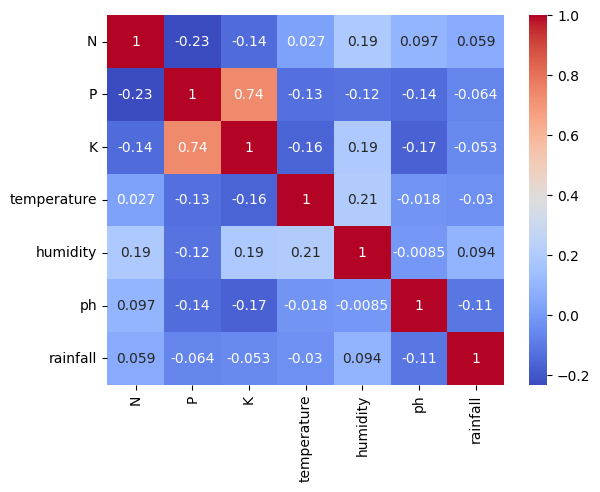

In [90]:
import seaborn as sns
sns.heatmap(corr, annot=True, cbar=True, cmap='coolwarm')

**It is a classification problem with multiple values
  Normally the classification prblem has only 2 valus**

In [91]:
crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

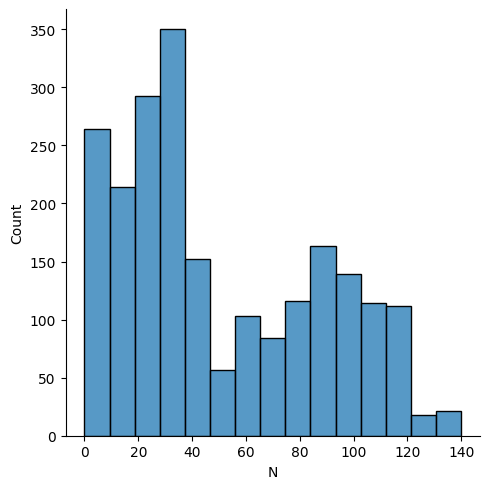

In [92]:
import matplotlib.pyplot as plt
sns.displot(crop['N'])
plt.show()

# Encoding 

In [93]:
crop_dict = {
    'rice' : 1,
    'maize' : 2, 
    'jute' : 3,
    'cotton' : 4,
    'coconut' : 5,
    'papaya' : 6,
    'orange' : 7,
    'apple' : 8,
    'muskmelon' : 9,
    'watermelon' : 10,
    'grapes' : 11,
    'mango' : 12,
    'banana' : 13,
    'pomegranate' : 14,
    'lentil' : 15,
    'blackgram': 16,
    'mungbean' : 17,
    'mothbeans' : 18,
    'pigeonpeas' : 19,
    'kidneybeans' : 20,
    'chickpea' : 21,
    'coffee' : 22
}

crop['crop_num'] = crop['label'].map(crop_dict)

In [94]:
crop['crop_num'].value_counts()

1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: crop_num, dtype: int64

In [95]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [96]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,22


**Let's drop the label column**

In [97]:
crop.drop('label', axis=1, inplace=True)

In [98]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [99]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,22
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,22


# Train Test Split

x contains the input features
y contain the output feature

x is typically to use it as the feature matrix (independent variables) for a machine learning model.

The variable y is typically used as the target variable (dependent variable) for a machine learning model. It represents the labels or outcomes that the model will try to predict based on the features in x.

In [100]:
x = crop.drop('crop_num', axis=1)
y = crop['crop_num']

In [101]:
x.shape

(2200, 7)

In [102]:
y.shape

(2200,)

**from sklearn.model_selection import train_test_split**

This line imports the train_test_split function from the model_selection module of the scikit-learn library. The train_test_split function is used to split a dataset into two subsets: one for training a machine learning model and another for testing the model's performance.


**x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)**

This line of code uses the train_test_split function to split the feature matrix x and the target variable y into training and testing sets. Here's a breakdown of the parameters:

x and y: The feature matrix and target variable you want to split.

test_size=0.2: This parameter determines the proportion of the dataset that should be used for testing. In this case, it's set to 0.2, meaning 20% of the data will be reserved for testing, and the remaining 80% will be used for training.

random_state=42: This parameter is used to ensure reproducibility. Setting a random state ensures that the data is split in the same way every time the code is run. The specific number (42 in this case) is arbitrary and can be any integer.

x_train, x_test, y_train, y_test: These are the resulting datasets after the split. x_train and y_train are the feature matrix and target variable for training, while x_test and y_test are for testing.

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [105]:
x_train.shape

(1760, 7)

In [106]:
x_test.shape

(440, 7)

In [107]:
y_train.shape

(1760,)

In [108]:
y_test.shape

(440,)

# Scale the features using MinMax Scaler

Scaling features using Min-Max Scaler is a data preprocessing step in machine learning that transforms numerical features to a specific range, typically between 0 and 1. This scaling method is also known as Min-Max normalization. The purpose of scaling is to ensure that all features contribute equally to the model training process, preventing certain features from dominating based on their magnitude.


MinMaxScaler scale every feature

**from sklearn.preprocessing import MinMaxScaler**
This line imports the MinMaxScaler class from the preprocessing module of the scikit-learn library. The MinMaxScaler is used for scaling features to a specified range, typically between 0 and 1.

**ms = MinMaxScaler()**
This line creates an instance of the MinMaxScaler class and assigns it to the variable ms. This instance will be used to scale the features.

**ms.fit(x_train)**
This line fits (or trains) the Min-Max scaler on the training data, x_train. During this process, the scaler computes the minimum and maximum values of each feature in the training set. These computed values are used to scale the features.

**x_train = ms.transform(x_train)**
This line transforms the training data, x_train, using the fitted Min-Max scaler. It applies the scaling transformation to each feature, ensuring that they are now within the specified range (commonly between 0 and 1).

**x_test = ms.transform(x_test)**
Similarly, this line transforms the test data, x_test, using the same Min-Max scaler. It's crucial to use the same scaler that was fitted on the training data to ensure consistency in scaling between the training and test sets.

In [109]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

ms.fit(x_train)
x_train = ms.transform(x_train)
x_test = ms.transform(x_test)

In [110]:
x_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

# Standarization
Standardization, also known as z-score normalization or zero-mean normalization, is a data preprocessing technique used in machine learning to rescale numerical features so that they have a mean of 0 and a standard deviation of 1. The goal of standardization is to bring all features to a similar scale, making it easier for machine learning models to learn and converge efficiently.

**from sklearn.preprocessing import StandardScaler**
This line imports the StandardScaler class from the preprocessing module of the scikit-learn library. The StandardScaler is used for standardizing features, bringing them to a mean of 0 and a standard deviation of 1.

**sc = StandardScaler()**
This line creates an instance of the StandardScaler class and assigns it to the variable sc. This instance will be used to standardize the features.

**sc.fit(x_train)**
This line fits (or trains) the Standard Scaler on the training data, x_train. During this process, the scaler computes the mean and standard deviation of each feature in the training set. These computed values will be used to standardize the features.

**x_train = sc.transform(x_train)**
This line transforms the training data, x_train, using the fitted Standard Scaler. It applies the standardization transformation to each feature, ensuring that they now have a mean of 0 and a standard deviation of 1.

**x_test = sc.transform(x_test)**
Similarly, this line transforms the test data, x_test, using the same Standard Scaler. It's crucial to use the same scaler that was fitted on the training data to ensure consistency in standardization between the training and test sets.

In [111]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [112]:
x_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

# Training Models

In [113]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
}


for name, md in models.items():
    md.fit(x_train,y_train)
    ypred = md.predict(x_test)
    
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

Naive Bayes  with accuracy : 0.9954545454545455
Decision Tree  with accuracy : 0.9840909090909091
Support Vector Machine  with accuracy : 0.9681818181818181
Logistic Regression  with accuracy : 0.9636363636363636
K-Nearest Neighbors  with accuracy : 0.9590909090909091


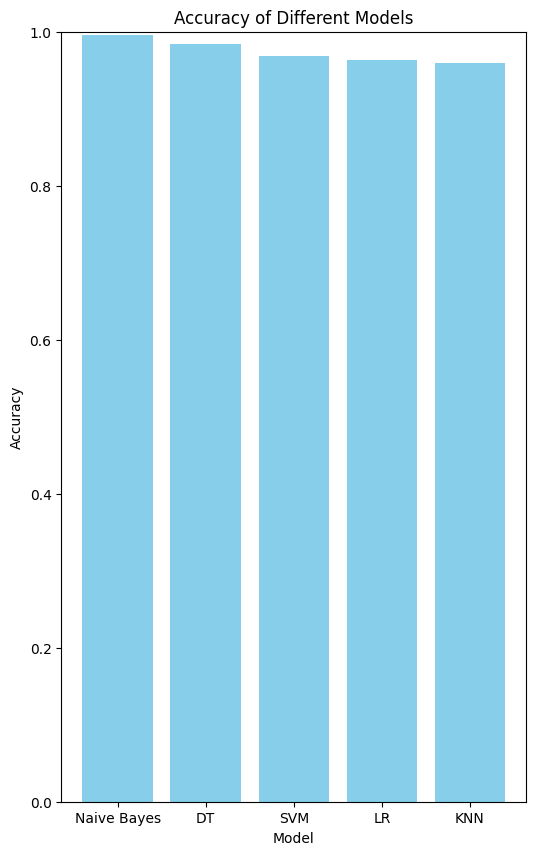

In [114]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming x_train, y_train, x_test, y_test are defined earlier

# Create instances of all models
models = {
    'Naive Bayes': GaussianNB(),
    'DT': DecisionTreeClassifier(),
    'SVM': SVC(),
    'LR': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
}

# Lists to store model names and their corresponding accuracies
model_names = []
accuracies = []

# Loop through each model, fit, predict, and calculate accuracy
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append model name and accuracy to lists
    model_names.append(name)
    accuracies.append(accuracy)

# Generate a bar plot
plt.figure(figsize=(6, 10))
plt.bar(model_names, accuracies, color='skyblue')
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Set y-axis limits to 0 and 1 for accuracy percentage
plt.show()


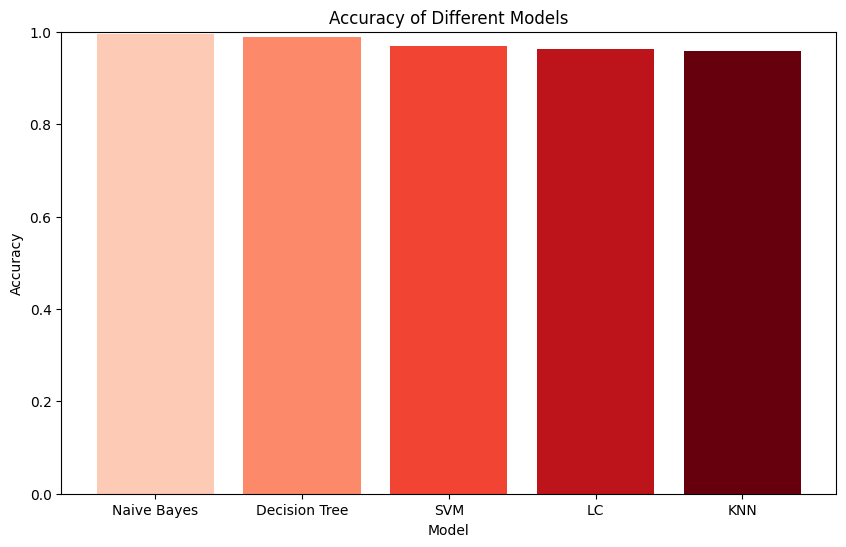

In [115]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming x_train, y_train, x_test, y_test are defined earlier

# Create instances of all models
models = {
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),  # Using 'SVM' as the abbreviation for Support Vector Machine
    'LC': LogisticRegression(),  # Using 'LC' as the abbreviation for Logistic Regression
    'KNN': KNeighborsClassifier(),  # Using 'KNN' as the abbreviation for K-Nearest Neighbors
}

# Lists to store model names, accuracies, and corresponding colors
model_names = []
accuracies = []
colors = []

# Loop through each model, fit, predict, and calculate accuracy
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append model name, accuracy, and color to lists
    model_names.append(name)
    accuracies.append(accuracy)

# Sort the models based on accuracy in descending order
sorted_indices = np.argsort(accuracies)[::-1]
model_names = [model_names[i] for i in sorted_indices]
accuracies = [accuracies[i] for i in sorted_indices]

# Assign colors to models
colors = plt.cm.Reds(np.linspace(0.2, 1, len(model_names)))

# Generate a bar plot with varying colors
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=colors)
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Set y-axis limits to 0 and 1 for accuracy percentage

# Display the plot
plt.show()


In [116]:
# Create an instance of Gaussian Naive Bayes
nb = GaussianNB()

# Train the model
nb.fit(x_train, y_train)

# Make predictions
ypred = nb.predict(x_test)

# Evaluate the accuracy
accuracy_score(y_test, ypred)

0.9954545454545455

# Making Predictive System 

In [117]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    transformed_features = ms.fit_transform(features)
    transformed_features = sc.fit_transform(transformed_features)
    prediction = nb.predict(transformed_features).reshape(1,-1)
    
    return prediction[0] 

In [118]:
N = 40
P = 50
k = 50
temperature = 40.0
humidity = 20
ph = 100
rainfall = 100

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)


crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Jute is a best crop to be cultivated 
